In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from pylab import *
from xclim.core.calendar import percentile_doy
from xclim.indices import tx10p

In [8]:

import 

data = xr.open_dataset('/home/posiden/Documents/Datasets/land_era5_daily_tmax_1960_1990.nc')
data

<xarray.Dataset>
Dimensions:    (time: 10957, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * time       (time) datetime64[ns] 1961-01-01T11:00:00 ... 1990-12-31T11:00:00
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Wed Mar 29 16:54:42 2023: cdo selyear,1961/1990 land_era5_d...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [9]:
tmax = data['t2m']

In [10]:
tasmax_per = percentile_doy(tmax, per=10).sel(percentiles=10)

: 

: 

In [1]:
import xarray as xr
import xclim as xc
import dask


data = xr.open_dataset('/home/posiden/Documents/Datasets/land_era5_daily_tmax_1960_1990.nc', chunks={'time': 10})  # Adjust chunk size as needed.

# Compute the 10th percentile for each day of the year.
tasmax_per = xc.core.calendar.percentile_doy(data['t2m'], per=10).sel(percentiles=10)

# Calculate the tx10p index using Dask.
cold_days = dask.delayed(xc.indices.tx10p)(data['t2m'], tasmax_per)
cold_days = cold_days.compute()

/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/dataset.py:4983: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  result = result._unstack_full_reindex(
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/variable.py:1787: PerformanceWarning: Res

: 

: 

In [2]:
import xarray as xr
import xclim as xc
import dask


data = xr.open_dataset('/home/posiden/Documents/Datasets/land_era5_daily_tmax_1960_1990.nc', chunks={'time': 1})

# Compute the 10th percentile for each day of the year.
tasmax_per = xc.core.calendar.percentile_doy(data['t2m'], per=10).sel(percentiles=10)

# Calculate the tx10p index using Dask.
cold_days = dask.delayed(xc.indices.tx10p)(data['t2m'], tasmax_per)
cold_days = cold_days.compute()


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/dataset.py:4983: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  result = result._unstack_full_reindex(
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/variable.py:1787: PerformanceWarning: Res

: 

: 

In [1]:
import xarray as xr
import xclim as xc

# Loading data using Dask with a reduced chunk size (1 day).
data = xr.open_dataset('/home/posiden/Documents/Datasets/land_era5_daily_tmax_1960_1990.nc', chunks={'time': 1})

# Compute the 10th percentile for each day of the year.
tasmax_per = xc.core.calendar.percentile_doy(data['t2m'], per=10).sel(percentiles=10)

# Calculate the tx10p index.
cold_days = xc.indices.tx10p(data['t2m'], tasmax_per)

# Compute the result using Dask's parallel computation.
cold_days = cold_days.compute()


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/dataset.py:4983: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  result = result._unstack_full_reindex(
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/variable.py:1787: PerformanceWarning: Res

: 

: 

In [1]:
import xarray as xr
import xclim as xc
import dask


data = xr.open_dataset('/home/posiden/Documents/Datasets/land_era5_daily_tmax_1960_1990.nc', chunks={'time': 10})

# Compute the 10th percentile for each day of the year.
tasmax_per = xc.core.calendar.percentile_doy(data['t2m'], per=10).sel(percentiles=10)

# Calculate the tx10p index using Dask.
cold_days = xc.indices.tx10p(data['t2m'], tasmax_per)

# Use Dask's `persist()` method to compute the result incrementally and store it in memory.
cold_days = dask.persist(cold_days)[0]




/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/dataset.py:4983: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  result = result._unstack_full_reindex(
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/variable.py:1787: PerformanceWarning: Res

: 

: 

In [2]:
import xarray as xr
import xclim as xc
import dask

data = xr.open_dataset('/home/posiden/Documents/Datasets/land_era5_daily_tmax_1960_1990.nc', chunks={'time': 1})

# Compute the 10th percentile for each day of the year.
tasmax_per = xc.core.calendar.percentile_doy(data['t2m'], per=10).sel(percentiles=10)

# Calculate the tx10p index using Dask.
cold_days = xc.indices.tx10p(data['t2m'], tasmax_per)

# Persist the result in memory.
cold_days = dask.persist(cold_days)[0]




/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/dataset.py:4983: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  result = result._unstack_full_reindex(
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/variable.py:1787: PerformanceWarning: Res

: 

: 

In [2]:
import xarray as xr
import xclim as xc
import dask
import pandas as pd


data = xr.open_dataset('/home/posiden/Documents/Datasets/land_era5_daily_tmax_1960_1990.nc', chunks={'time': 7})

results = []

# Split the time dimension into 7-day windows
time_slices = pd.date_range(start=data.time.values[0], end=data.time.values[-1], freq='7D')

for i in range(1, len(time_slices)):
    week_data = data.sel(time=slice(time_slices[i-1], time_slices[i]))

    # Compute the 10th percentile for each day of the week.
    tasmax_per = xc.core.calendar.percentile_doy(week_data['t2m'], per=10).sel(percentiles=10)

    # Calculate the tx10p index using Dask.
    cold_days = xc.indices.tx10p(week_data['t2m'], tasmax_per)

    # Persist the result in memory.
    cold_days = dask.persist(cold_days)[0]

    results.append(cold_days)

# Concatenate the results along the time dimension
final_result = xr.concat(results, dim='time')




/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(valu

KeyboardInterrupt: 

In [17]:
from xclim.core.calendar import percentile_doy
from xclim.indices import tx10p

data = xr.open_dataset('/home/posiden/Documents/Datasets/tmax.nc')
data

<xarray.Dataset>
Dimensions:    (time: 88, longitude: 1440, latitude: 721)
Coordinates:
  * time       (time) datetime64[ns] 1961-06-03T11:00:00 ... 1961-08-29T11:00:00
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Jul 31 23:23:12 2023: cdo ydrunmax,5 jja.nc tmax.nc\nMo...
    frequency:    day
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [18]:
tmax = data['t2m']
tasmax_per = percentile_doy(tmax, per=10).sel(percentiles=10)
tasmax_per

/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)


<xarray.DataArray 'per' (latitude: 721, longitude: 1440, dayofyear: 88)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
...
        [223.47331238, 223.47331238, 223.47331238, ..., 219.75144958,
         220.27627563, 221.69651794],
        [223.47732544, 223.47732544, 223.47732544, ..., 219.75344849,
         220.28027344, 221.70051575],
        [223.47932434, 223.47932434, 223.47932434, ..., 219.75544739,
         220.2842865 , 221.70452881]],

       [[223.22291565, 223.22291565, 223.22291565, ..., 219.90969849,
         219.90969849, 220.87521362],
        [223.22291565, 223.22291565, 223.22291565, ..., 219.90969849,
         219.90969849, 220.87521362],
        [223.22291565, 223.22291565, 223.22291565, ..., 219.90969849,
         219.90969849, 220.87521362],
        ...,
        [223.22291565, 223.22291565, 223.22291565, ..., 219.90969849,
         219.90969849, 220.87521362],
        [223.22291565, 223.22291565, 223.22291565, ..., 219.90969849,
         219.90969849, 220.87521362],
        [223.22291565, 223.22291565, 223.22291565, ..., 219.90969849,
         219.90969849, 220.87521362]]])
Coordinates:
  * dayofyear    (dayofyear) int64 154 155 156 157 158 ... 237 238 239 240 241
  * longitude    (longitude) float32 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude     (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    percentiles  int64 10
Attributes:
    long_name:           2 metre temperature
    units:               K
    cell_methods:        time: maximum
    climatology_bounds:  ['1961-06-03', '1961-08-29']
    window:              5
    alpha:               0.3333333333333333
    beta:                0.3333333333333333
    history:             [2023-08-01 00:20:44] per: percentile_doy(arr=t2m, w...

In [19]:
cold_days = tx10p(tmax, tasmax_per)


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


In [25]:
print(cold_days.isnull().all())


<xarray.DataArray ()>
array(False)
Coordinates:
    percentiles  int64 10


<xarray.DataArray ()>
array(False)
Coordinates:
    percentiles  int64 10


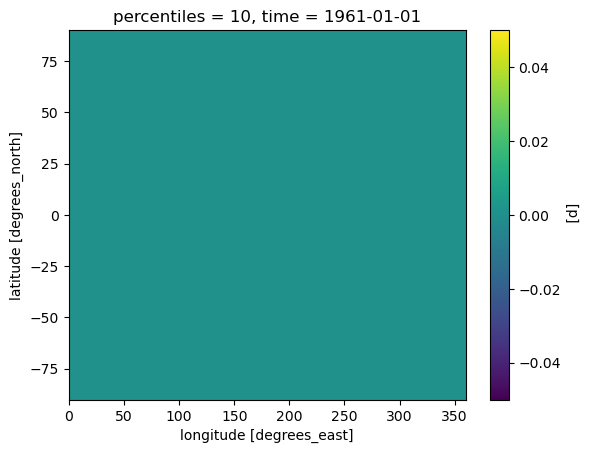

In [24]:
cold_days.isel(time=0).plot()



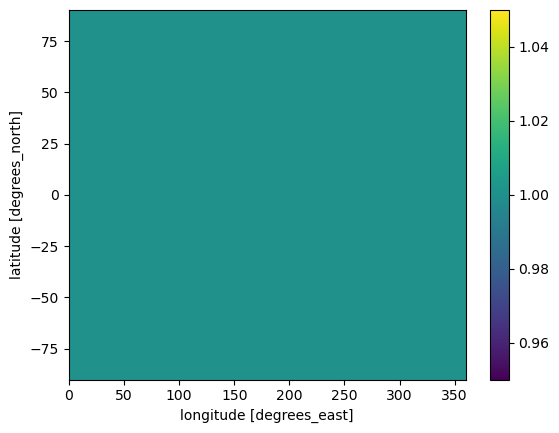

In [27]:
import numpy as np

non_nan_points_array = np.sum(np.isnan(cold_days.values), axis=0) < len(cold_days.time)


non_nan_points = xr.DataArray(non_nan_points_array, coords=[cold_days.latitude, cold_days.longitude], dims=["latitude", "longitude"])


non_nan_points.plot()


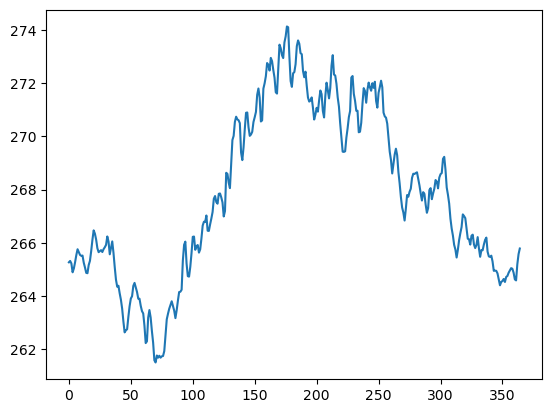

In [16]:
plt.plot(tmax.mean(dim='latitude').mean(dim='longitude'))